# This notebook will create a windrose!


In [86]:
#import packages 
#https://hatarilabs.com/ih-en/how-to-make-a-wind-rose-with-python-tutorial
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import pi
!pip install windrose openpyxl
from windrose import WindroseAxes

%matplotlib inline

In [87]:
df = pd.read_csv('Data/dfD_dec11.csv')
df.head()
df.tail()

,X,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,West,East,precip_accum_one_hour_set_1,AQI_bucket_calculated,AQI_calculated_where,AQI_Cause,mPM,mNO2,mWS,mWD
7012,740,Seattle 10th & Weller,2016-05-30,0.297025,9.030000,NaN,NaN,NaN,5.033333,NaN,...,537.0,563.0,0.000000,Poor,PM2.5MO_SubIndex,PM2.5,5.033333,9.030000,3.925000,127.000000
7013,2704,Seattle 10th & Weller,2021-10-15,0.443017,18.413043,NaN,NaN,7.208333,NaN,NaN,...,367.0,381.0,2.221905,Poor,PM2.5MO_SubIndex,PM2.5,7.208333,18.413043,5.633333,171.416667
7014,4710,Seattle Beacon Hill,2016-05-29,0.150600,NaN,NaN,33.750000,NaN,3.133333,81.083333,...,153.0,134.0,1.183333,Poor,PM2.5MO_SubIndex,PM2.5,3.133333,NaN,NaN,99.125000
7015,4711,Seattle Beacon Hill,2016-05-30,0.174008,NaN,NaN,31.739130,NaN,5.483333,63.375000,...,537.0,563.0,0.000000,Poor,PM2.5MO_SubIndex,PM2.5,5.483333,NaN,NaN,187.041667
7016,6675,Seattle Beacon Hill,2021-10-15,0.208388,NaN,12.053636,22.916667,4.652174,NaN,80.416667,...,367.0,381.0,2.221905,Poor,PM2.5MO_SubIndex,PM2.5,4.652174,12.053636,NaN,155.041667


In [88]:
list(df.columns)

['X',
 'Site',
 'Date',
 'CO',
 'NO2',
 'NO2_caps',
 'ozone',
 'PM2.5_MO',
 'PM2.5_FEM',
 'RH',
 'SO2',
 'Temperature',
 'Temperature_10_m',
 'Wind_Direction_s',
 'Wind_Direction_v',
 'Wind_Speed_p',
 'Wind_Speed_s',
 'Ozone_8hr_avg',
 'PM2.5_MO_24hr_avg',
 'PM2.5_FEM_24hr_avg',
 'CO_8hr_avg',
 'PM2.5MO_SubIndex',
 'PM2.5FEM_SubIndex',
 'PM2.5_1hrMO_SubIndex',
 'PM2.5_1hrFEM_SubIndex',
 'X03_SubIndex',
 'CO_SubIndex',
 'SO2_SubIndex',
 'NO2_SubIndex',
 'NO2_CAPS_SubIndex',
 'AQI_calculated',
 'Fremont.Bridge.Total',
 'Fremont.Bridge.East.Sidewalk',
 'Fremont.Bridge.West.Sidewalk',
 'Spokane.St..Bridge.Total',
 'West',
 'East',
 'precip_accum_one_hour_set_1',
 'AQI_bucket_calculated',
 'AQI_calculated_where',
 'AQI_Cause',
 'mPM',
 'mNO2',
 'mWS',
 'mWD']

In [89]:
df.mWD.mean()

171.16469139788856

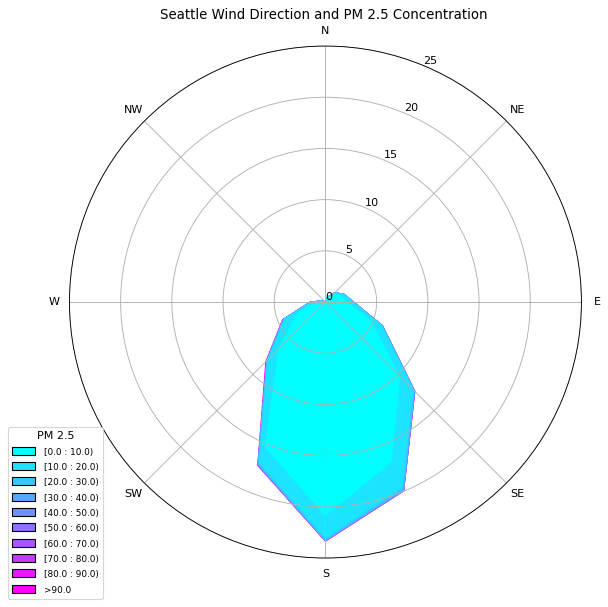

In [90]:
ax = WindroseAxes.from_ax()
ax.contourf(df['mWD'], df['mPM'], bins=np.arange(0, 100, 10), cmap=cm.cool, normed= True)
ax.set_legend(title='PM 2.5', loc=(-0.12, -0.08))
ax.set_title("Seattle Wind Direction and PM 2.5 Concentration ")
#ax.set_thetagrids(range(0,360,10),[90, 80, 70, 60, 50, 40, 30, 20, 10, 0, 350, 340, 330, 320, 310, 300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100]);
ax.set_thetagrids(range(0,360,45),['E','NE', 'N','NW','W','SW', 'S', 'SE']);
ax.set_yticks(np.arange(0, 30, step=5))
ax.set_yticklabels(range(0,30,5));

In [91]:
df

,X,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,West,East,precip_accum_one_hour_set_1,AQI_bucket_calculated,AQI_calculated_where,AQI_Cause,mPM,mNO2,mWS,mWD
0,0,Seattle 10th & Weller,2014-05-21,NaN,NaN,NaN,NaN,NaN,9.100000,NaN,...,729.0,789.0,0.000000,Good,PM2.5FEM_SubIndex,PM2.5,9.100000,NaN,NaN,NaN
1,1,Seattle 10th & Weller,2014-05-22,NaN,NaN,NaN,NaN,NaN,8.336364,NaN,...,756.0,795.0,0.000000,Good,PM2.5FEM_SubIndex,PM2.5,8.336364,NaN,NaN,NaN
2,2,Seattle 10th & Weller,2014-05-23,NaN,NaN,NaN,NaN,NaN,6.591667,NaN,...,359.0,392.0,3.140000,Good,PM2.5FEM_SubIndex,PM2.5,6.591667,NaN,NaN,NaN
3,4,Seattle 10th & Weller,2014-05-25,NaN,NaN,NaN,NaN,NaN,6.104167,NaN,...,186.0,180.0,0.600000,Good,PM2.5FEM_SubIndex,PM2.5,6.104167,NaN,NaN,NaN
4,5,Seattle 10th & Weller,2014-05-26,NaN,NaN,NaN,NaN,NaN,4.195833,NaN,...,323.0,329.0,4.606667,Good,PM2.5FEM_SubIndex,PM2.5,4.195833,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,740,Seattle 10th & Weller,2016-05-30,0.297025,9.030000,NaN,NaN,NaN,5.033333,NaN,...,537.0,563.0,0.000000,Poor,PM2.5MO_SubIndex,PM2.5,5.033333,9.030000,3.925000,127.000000
7013,2704,Seattle 10th & Weller,2021-10-15,0.443017,18.413043,NaN,NaN,7.208333,NaN,NaN,...,367.0,381.0,2.221905,Poor,PM2.5MO_SubIndex,PM2.5,7.208333,18.413043,5.633333,171.416667
7014,4710,Seattle Beacon Hill,2016-05-29,0.150600,NaN,NaN,33.750000,NaN,3.133333,81.083333,...,153.0,134.0,1.183333,Poor,PM2.5MO_SubIndex,PM2.5,3.133333,NaN,NaN,99.125000
7015,4711,Seattle Beacon Hill,2016-05-30,0.174008,NaN,NaN,31.739130,NaN,5.483333,63.375000,...,537.0,563.0,0.000000,Poor,PM2.5MO_SubIndex,PM2.5,5.483333,NaN,NaN,187.041667


In [92]:
df.rename(columns = {'mPM':'PM 2.5', 'mWD':'Wind Direction'}, inplace = True)

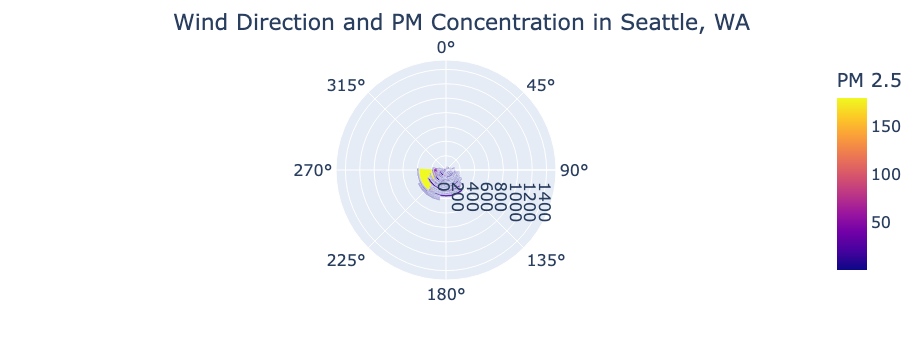

In [103]:
import plotly.express as px
import plotly.graph_objects as go
#df = px.data.wind()
fig = px.bar_polar(df, r="PM 2.5", theta="Wind Direction",
                   color="PM 2.5", template="plotly",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)

fig.update_layout(
    title='Wind Direction and PM Concentration in Seattle, WA',title_x=0.5,
    font_size=16,
    legend_font_size=16,
    polar_angularaxis_rotation=90,
)




fig.show()



In [104]:
list(df.columns)

['X',
 'Site',
 'Date',
 'CO',
 'NO2',
 'NO2_caps',
 'ozone',
 'PM2.5_MO',
 'PM2.5_FEM',
 'RH',
 'SO2',
 'Temperature',
 'Temperature_10_m',
 'Wind_Direction_s',
 'Wind_Direction_v',
 'Wind_Speed_p',
 'Wind_Speed_s',
 'Ozone_8hr_avg',
 'PM2.5_MO_24hr_avg',
 'PM2.5_FEM_24hr_avg',
 'CO_8hr_avg',
 'PM2.5MO_SubIndex',
 'PM2.5FEM_SubIndex',
 'PM2.5_1hrMO_SubIndex',
 'PM2.5_1hrFEM_SubIndex',
 'X03_SubIndex',
 'CO_SubIndex',
 'SO2_SubIndex',
 'NO2_SubIndex',
 'NO2_CAPS_SubIndex',
 'AQI_calculated',
 'Fremont.Bridge.Total',
 'Fremont.Bridge.East.Sidewalk',
 'Fremont.Bridge.West.Sidewalk',
 'Spokane.St..Bridge.Total',
 'West',
 'East',
 'precip_accum_one_hour_set_1',
 'AQI_bucket_calculated',
 'AQI_calculated_where',
 'AQI_Cause',
 'PM 2.5',
 'mNO2',
 'mWS',
 'Wind Direction']

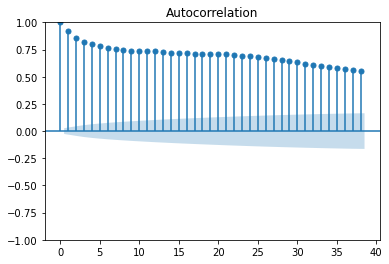

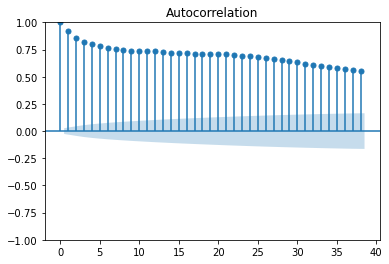

In [119]:
from statsmodels.graphics.tsaplots import plot_acf

dff= df['Fremont.Bridge.Total']
dff= dff.dropna()

dft= df['Temperature_10_m']
dft= dft.dropna()


plot_acf(dft)